In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data_for_map_df = pd.read_excel('https://query.data.world/s/htjrn2juzru4lkbbx2tfs3zgxlo4bm?dws=00000',sheet_name = 0)
data_line_chart_df = pd.read_excel('https://query.data.world/s/htjrn2juzru4lkbbx2tfs3zgxlo4bm?dws=00000',sheet_name=1)

In [3]:
data_for_map_df

,Country,Cumulative production
0,Afghanistan,3
1,Albania,0
2,Algeria,110
3,American Samoa,0
4,Angola,1
...,...,...
215,Western Sahara,0
216,Yemen,2
217,Yugoslavia,2
218,Zambia,0


In [4]:
data_for_map_df.describe()

,Cumulative production
count,220.000000
mean,23.286364
std,118.567803
min,0.000000
25%,0.000000
50%,0.000000
75%,3.250000
max,1468.000000


In [5]:
data_for_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                220 non-null    object
 1   Cumulative production  220 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ KB


In [6]:
data_for_map_df.isnull().sum()

Country                  0
Cumulative production    0
dtype: int64

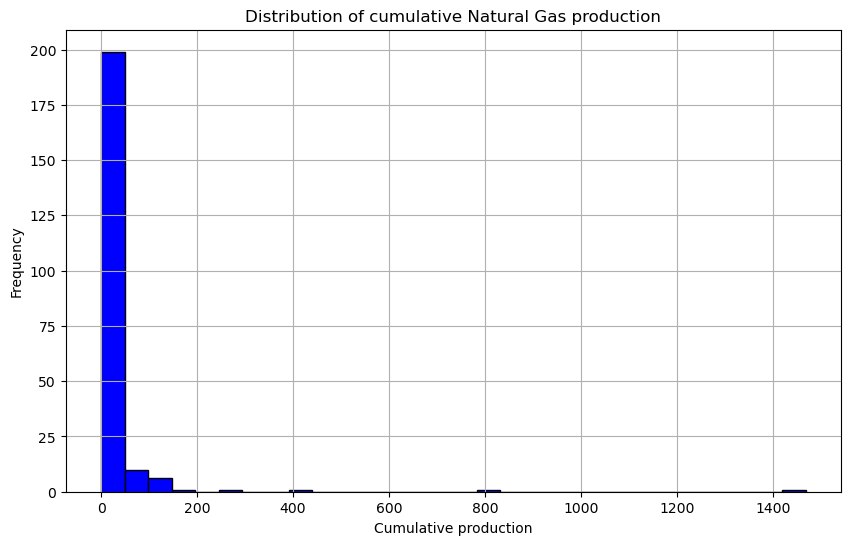

In [7]:
# plot a histogram
plt.figure(figsize = (10,6))
plt.hist(data_for_map_df["Cumulative production"],bins = 30,color = "blue", edgecolor = "black")
plt.title("Distribution of cumulative Natural Gas production")
plt.xlabel("Cumulative production")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

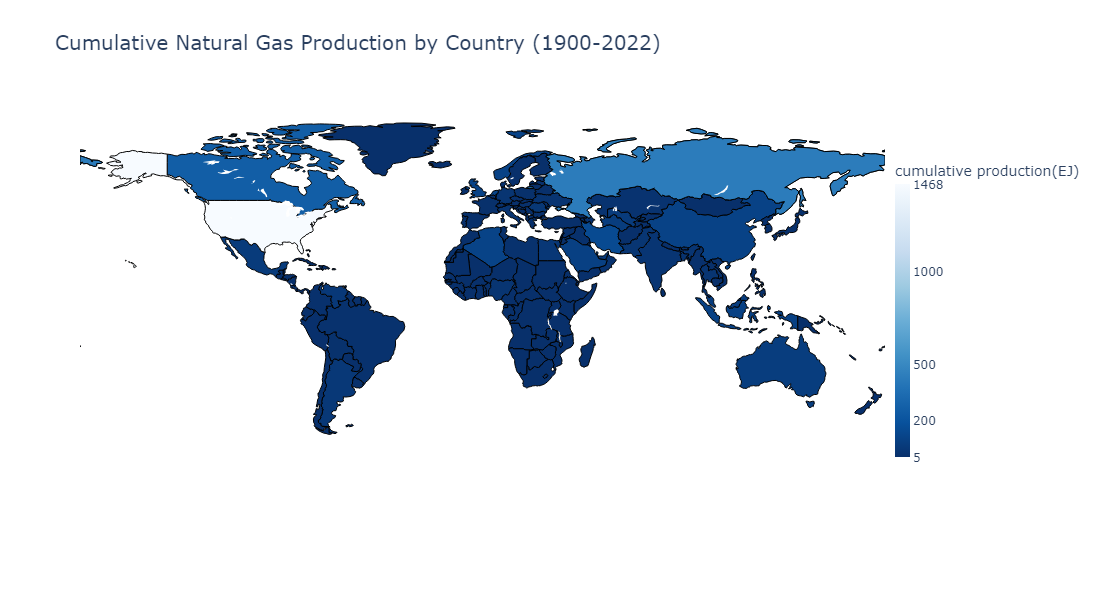

In [15]:
# creating choropleth map with plotly graph objects

fig = go.Figure(data = go.Choropleth(
    locations = data_for_map_df["Country"],
    locationmode='country names',
    z = data_for_map_df["Cumulative production"],
    text = data_for_map_df["Country"],
    colorscale = "Blues",
    autocolorscale = False,
    reversescale = True,
    marker_line_color = "black",
    marker_line_width=1,
    colorbar=dict(
        title='cumulative production(EJ)',
        tickvals=[5, 200, 500, 1000, 1468],
        ticktext=['5', '200', '500', '1000', '1468'],
        x=1.0,
        y=0.5,
        len=0.75,
        thickness=15,
    ),
    zmin=5,  # Start color bar at 5
    zmax=1468  # End color bar at 1468
))
 # update the plot
fig.update_layout(
    title_text = "Cumulative Natural Gas Production by Country (1900-2022)",
    title_font_size = 20,
    geo = dict(
        showframe = False,
        showcoastlines = False,
        bgcolor='rgba(0,0,0,0)', 
        landcolor='rgba(0,0,0,0)',
        subunitcolor='black',
        subunitwidth=0.5
    ),
   height = 600
)

fig.show()

In [9]:
data_line_chart_df

,Year,United States,Russia,Iran,China,Canada,Afghanistan,Albania,Algeria,Angola,...,USSR,Ukraine,United Arab Emirates,United Kingdom,Uzbekistan,Venezuela,Vietnam,World,Yemen,Yugoslavia
0,1900,0.265826,NaN,0.000000,0.000000,0,0.0,0.0,0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.265826,NaN,0.0
1,1901,0.294581,NaN,0.000000,0.000000,0,0.0,0.0,0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.294581,NaN,0.0
2,1902,0.323337,NaN,0.000000,0.000000,0,0.0,0.0,0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.323337,NaN,0.0
3,1903,0.352092,NaN,0.000000,0.000000,0,0.0,0.0,0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.352092,NaN,0.0
4,1904,0.380848,NaN,0.000000,0.000000,0,0.0,0.0,0,0.0,...,0.0,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.380848,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2018,30.273700,24.087809,8.096363,5.811079,6.36396552,NaN,NaN,3.378375,NaN,...,NaN,0.708673,1.905122,1.463003,2.098265,1.138288,0.347747,138.809520,0.003608,NaN
119,2019,33.411996,24.444967,8.384403,6.362692,6.1065702,NaN,NaN,3.13028086,NaN,...,NaN,0.698451,2.023085,1.414473,2.068503,0.920744,0.354348,142.863523,0.003608,NaN
120,2020,32.979762,22.984079,8.983088,6.984332,5.962068,NaN,NaN,2.93128596,NaN,...,NaN,0.688230,1.819829,1.424570,1.695642,0.776199,0.318218,138.981600,0.004690,NaN
121,2021,33.989108,25.276207,9.239405,7.531664,6.20455392,NaN,NaN,3.6395321,NaN,...,NaN,0.674602,2.100442,1.180273,1.833079,1.010128,0.259160,145.923131,0.004690,NaN


In [10]:
data_line_chart_df.isnull().sum()

Year              0
United States     0
Russia           85
Iran              0
China             0
                 ..
Venezuela         0
Vietnam          80
World             0
Yemen            80
Yugoslavia       31
Length: 103, dtype: int64

In [11]:
# Convert columns to numeric values, forcing non-numeric values to NaN
for column in data_line_chart_df.columns:
    if column != 'Year':
        data_line_chart_df[column] = pd.to_numeric(data_line_chart_df[column], errors='coerce')

# Replace NaN values with the mean of the respective columns
data_line_chart_df.fillna(data_line_chart_df.mean(), inplace=True)

In [12]:
data_line_chart_df.isnull().sum()

Year             0
United States    0
Russia           0
Iran             0
China            0
                ..
Venezuela        0
Vietnam          0
World            0
Yemen            0
Yugoslavia       0
Length: 103, dtype: int64

Enter any  5 country names with comma seprated:  United States,Russia,Iran,China,Canada


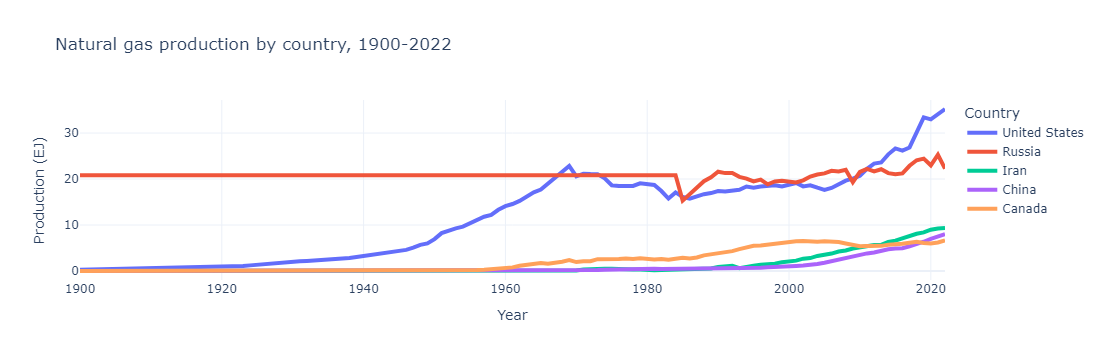

In [13]:
# create a line chart using plotly with data_for_line dataframe
# line chart will be used to plot the cumulative production of each country over the years
# lets take input any 5 countries add their traces to graph for visualization
countries = input("Enter any  5 country names with comma seprated: ").split(',')
# filter valid countries with stripping white spaces
countries = [country.strip() for country in countries if country.strip() in data_line_chart_df.columns]

if len(countries) != 5:
    print("Please enter exactly five valid country names.")
else:
    # create figure with plotly graph objects as go
    fig = go.Figure()
    # Add traces for each country
    for country in countries:
        trace = go.Scatter(
            x=data_line_chart_df['Year'],
            y=data_line_chart_df[country],
            mode='lines',
            name=country,
            line = dict(width=4)
        )
        fig.add_trace(trace)
    fig.update_layout(
        title='Natural gas production by country, 1900-2022',
        xaxis_title='Year',
        yaxis_title='Production (EJ)',
        legend_title='Country',
        template='plotly_white'
    )
    fig.show()

## key insights:
- **Top Producers**: Countries like the USA, Russia, and Canada stand out as the top producers of natural gas.
- **Regional Trends**: Notice the high production levels in North America and Eurasia, contrasting with lower production levels in Africa and Oceania.
- **Historical Context**: This visualization highlights how natural gas production has evolved over more than a century, reflecting technological advancements and geopolitical changes.